<a href="https://colab.research.google.com/github/saraswathykrk/CNN/blob/main/CNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command
%pwd

/content/gdrive/My Drive/Kaggle


'/content/gdrive/My Drive/Kaggle'

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=1a688e09e90db2394551063512c0d04300a2c85d63fbc11d0dba6c3e76233f71
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle -v

Kaggle API 1.5.12


In [28]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [32]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)

2.4.1


In [39]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Bidirectional, BatchNormalization, GRU, TimeDistributed
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.utils import plot_model

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 75, 75, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 75, 75, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 37, 37, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 37, 37, 128)       73856     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 18, 18, 128)       0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 18, 18, 128)     

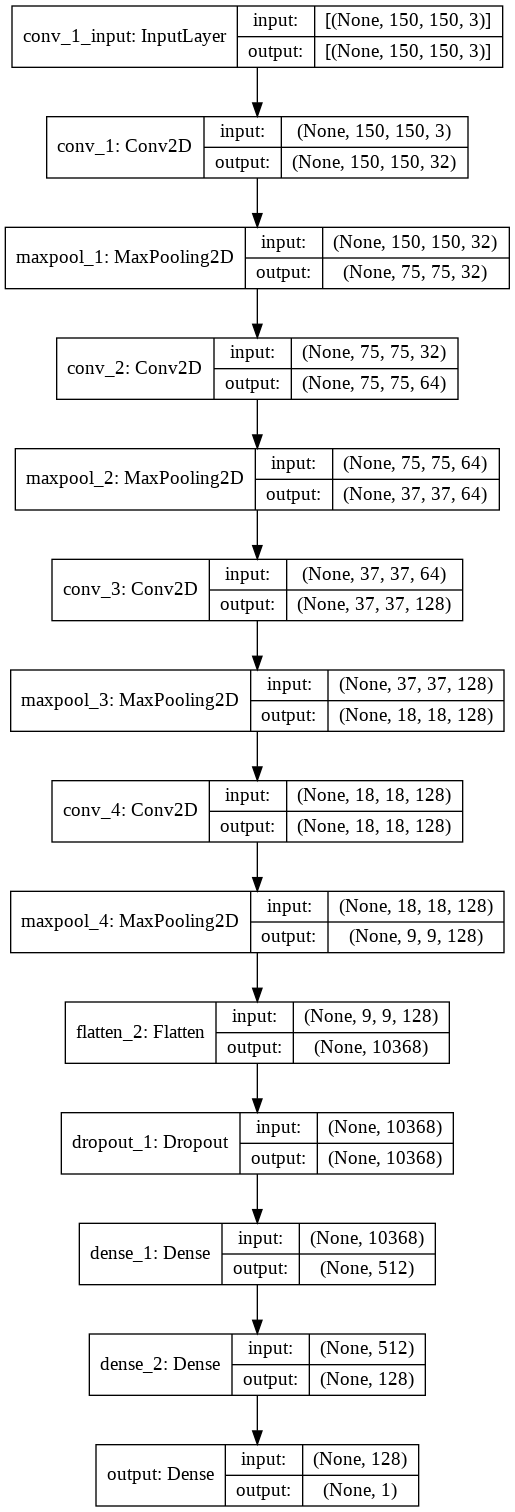

In [45]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1',input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2), name='maxpool_1'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2'))
model.add(MaxPooling2D((2, 2), name='maxpool_2'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3'))
model.add(MaxPooling2D((2, 2), name='maxpool_3'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_4'))
model.add(MaxPooling2D((2, 2), name='maxpool_4'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', name='dense_1'))
model.add(Dense(128, activation='relu', name='dense_2'))
model.add(Dense(1, activation='sigmoid', name='output'))
print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)